In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

In [60]:
df = pd.read_csv('E:/NASA STAR CLASSIFICATION DATASET.csv')
df['Type'] = df['Type'].astype(str)
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


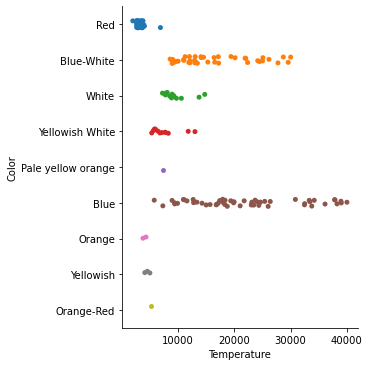

In [61]:
df['Color'] = df['Color'].replace(['Blue White','Blue white','Blue-white'],'Blue-White')
df['Color'] = df['Color'].replace(['yellow-white','White-Yellow'],'Yellowish White')
df['Color'] = df['Color'].replace(['yellowish'],'Yellowish')
df['Color'] = df['Color'].replace(['Whitish','white'],'White')

sns.catplot(x='Temperature',y='Color',data= df)

In [62]:
dict_type = {'0':'Red Dwarf','1': 'Brown Dwarf','2': 'White Dwarf','3': 'Main Sequence','4': 'Supergiants','5': 'Hypergiants'}
df['Type'] = df['Type'].replace(dict_type.keys(),dict_type.values())
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,Red Dwarf
1,3042,0.000500,0.1542,16.60,Red,M,Red Dwarf
2,2600,0.000300,0.1020,18.70,Red,M,Red Dwarf
3,2800,0.000200,0.1600,16.65,Red,M,Red Dwarf
4,1939,0.000138,0.1030,20.06,Red,M,Red Dwarf
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,Hypergiants
236,30839,834042.000000,1194.0000,-10.63,Blue,O,Hypergiants
237,8829,537493.000000,1423.0000,-10.73,White,A,Hypergiants
238,9235,404940.000000,1112.0000,-11.23,White,A,Hypergiants


In [63]:
df_enc = pd.get_dummies(data=df.drop('Type',axis=1), columns=['Color','Spectral_Class'],drop_first= True)

In [64]:
df_enc.shape

(240, 18)

In [67]:
X = df_enc
y = pd.DataFrame(df['Type'],columns=['Type'])

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size = 0.1,random_state = 20)

In [69]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_mm = pd.DataFrame(mm.fit_transform(X_train),columns=['Temperature', 'L', 'R', 'A_M', 'Color_Blue-White', 'Color_Orange',
       'Color_Orange-Red', 'Color_Pale yellow orange', 'Color_Red',
       'Color_White', 'Color_Yellowish', 'Color_Yellowish White',
       'Spectral_Class_B', 'Spectral_Class_F', 'Spectral_Class_G',
       'Spectral_Class_K', 'Spectral_Class_M', 'Spectral_Class_O'])
X_test_mm = pd.DataFrame(mm.transform(X_test),columns=['Temperature', 'L', 'R', 'A_M', 'Color_Blue-White', 'Color_Orange',
       'Color_Orange-Red', 'Color_Pale yellow orange', 'Color_Red',
       'Color_White', 'Color_Yellowish', 'Color_Yellowish White',
       'Spectral_Class_B', 'Spectral_Class_F', 'Spectral_Class_G',
       'Spectral_Class_K', 'Spectral_Class_M', 'Spectral_Class_O'])


In [70]:
X_train_mm

,Temperature,L,R,A_M,Color_Blue-White,Color_Orange,Color_Orange-Red,Color_Pale yellow orange,Color_Red,Color_White,Color_Yellowish,Color_Yellowish White,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,0.470849,1.222960e-09,0.000002,0.727330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.258821,8.392863e-11,0.000001,0.766417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.725703,2.254083e-01,0.003371,0.247342,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.195318,5.089912e-01,0.013456,0.185428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.181025,6.444436e-01,0.798092,0.037211,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.635848,1.740920e-02,0.003074,0.253909,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
212,0.564909,6.443680e-01,0.045424,0.185897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
213,0.036809,4.460207e-09,0.000130,0.781426,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
214,0.399385,1.058700e-03,0.003166,0.290181,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
model = lr.fit(X_train_mm,y_train)
predictions = model.predict(X_test_mm)
model_score = model.score(X_test_mm,y_test)
print("THE ACCURACY OF LOGISTIC REGRESSION CLASSIFIER IS",model_score)

THE ACCURACY OF LOGISTIC REGRESSION CLASSIFIER IS 0.9583333333333334


C:\Users\Pradeep\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_rf = rf.fit(X_train_mm,y_train)
predictions = model_rf.predict(X_test_mm)
model_score_rf = model_rf.score(X_test_mm,y_test)
print("THE ACCURACY OF RANDOM FOREST CLASSIFIER IS",model_score_rf)

<ipython-input-72-78ab61b5a859>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = rf.fit(X_train_mm,y_train)


THE ACCURACY OF RANDOM FOREST CLASSIFIER IS 1.0


In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1,metric='euclidean',weights='uniform')
model_knn = knn.fit(X_train_mm,y_train)
model_knn_score = knn.score(X_test_mm,y_test)
model_knn_score
model_knn_predictions = knn.predict(X_test_mm)
print("THE TEST ACCURACY OF KNN CLASSIFIER IS",model_knn_score)

THE TEST ACCURACY OF KNN CLASSIFIER IS 1.0


<ipython-input-73-5df2aa6ffbbc>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_knn = knn.fit(X_train_mm,y_train)


In [74]:
from tensorflow import keras
y_train = pd.get_dummies(data=y_train,columns =['Type'])
y_test = pd.get_dummies(data=y_test,columns =['Type'])

In [75]:
model_nn = keras.Sequential([keras.layers.Dense(500,kernel_initializer = 'he_uniform',input_shape=(18,),activation = 'relu'),
                            keras.layers.Dense(720,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(800,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(6,kernel_initializer = 'glorot_uniform',activation = 'softmax'),
                            ])
from tensorflow.keras.callbacks import  EarlyStopping
es = EarlyStopping(patience=3,restore_best_weights= True)
model_nn.compile(loss = "categorical_crossentropy",metrics = ['accuracy'],optimizer = 'sgd')
history = model_nn.fit(X_train_mm,y_train,validation_data = (X_test_mm,y_test),epochs = 30,callbacks = es)

Epoch 1/30
7/7 [==============================] - 1s 101ms/step - loss: 1.8586 - accuracy: 0.2415 - val_loss: 1.4164 - val_accuracy: 0.4167
Epoch 2/30
7/7 [==============================] - 0s 27ms/step - loss: 1.3288 - accuracy: 0.5138 - val_loss: 1.1387 - val_accuracy: 0.6250
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 1.0932 - accuracy: 0.6944 - val_loss: 1.0182 - val_accuracy: 0.7083
Epoch 4/30
7/7 [==============================] - 0s 28ms/step - loss: 0.9474 - accuracy: 0.6929 - val_loss: 0.9108 - val_accuracy: 0.8750
Epoch 5/30
7/7 [==============================] - 0s 24ms/step - loss: 0.8478 - accuracy: 0.7367 - val_loss: 0.8319 - val_accuracy: 0.8750
Epoch 6/30
7/7 [==============================] - 0s 38ms/step - loss: 0.7615 - accuracy: 0.8540 - val_loss: 0.7484 - val_accuracy: 0.8333
Epoch 7/30
7/7 [==============================] - 0s 28ms/step - loss: 0.7171 - accuracy: 0.8236 - val_loss: 0.6924 - val_accuracy: 0.7500
Epoch 8/30
7/7 [==========

In [76]:
test_loss,test_acc= model_nn.evaluate(X_test_mm,y_test)
print("test_accuracy:",test_acc)


1/1 [==============================] - 0s 22ms/step - loss: 0.3229 - accuracy: 0.9583
test_accuracy: 0.9583333134651184


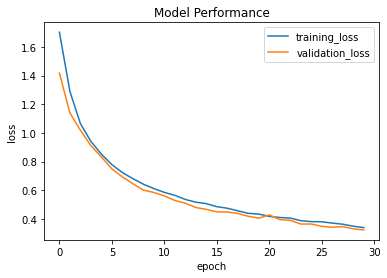

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'], loc='upper right')
plt.show()

We can see that the model performs really well. There is no overfitting.

THE TEST ACCURACY OF LOGISTIC REGRESSION IS 95.83%

THE TEST ACCURACY OF RANDOM FOREST CLASSIFIER IS 100%

THE TEST ACCURACY OF KNN CLASSIFIER IS 100%

THE TEST ACCURACY OF ARTIFICIAL NEURAL NETWORK IS 95.8%